In [1]:
import os
import pandas as pd
import numpy as np
#import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import keras
import utils

In [2]:



DATA_PATH = "/Users/mykola/MLHEP/Wiremind/"
raw_features = pd.read_csv(os.path.join(DATA_PATH, "ds_train.csv"))

In [3]:
all_features = utils.features_preparation(raw_features)
all_features

,current_price,days_before_departure,departure_date,direction,train_number,demand,od_destination_time_year,od_destination_time_month,od_destination_time_week,od_destination_time_day,...,od_destination_time_minute,od_origin_time_hour,od_origin_time_minute,od_time_travel,of_holiday,unof_holiday,od_destination_time_hourmin,od_origin_time_hourmin,direction_bool,date_numerical
0,100,0,2018-01-02,outbound,941,1.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
1,100,1,2018-01-02,outbound,941,1.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
2,100,2,2018-01-02,outbound,941,0.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
3,100,3,2018-01-02,outbound,941,1.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
4,100,4,2018-01-02,outbound,941,0.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292645,44,25,2018-12-28,inbound,980,0.0,2018,12,52,28,...,53,21,50,123.0,0,0,1433,1310,0,362
292646,44,26,2018-12-28,inbound,980,0.0,2018,12,52,28,...,53,21,50,123.0,0,0,1433,1310,0,362
292647,44,27,2018-12-28,inbound,980,0.0,2018,12,52,28,...,53,21,50,123.0,0,0,1433,1310,0,362
292648,44,28,2018-12-28,inbound,980,0.0,2018,12,52,28,...,53,21,50,123.0,0,0,1433,1310,0,362


In [4]:
scaled_features = utils.features_scale(all_features)
scaled_features

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,current_price,days_before_departure,od_destination_time_month,od_destination_time_week,od_destination_time_day,od_destination_time_weekday,od_time_travel,od_destination_time_hourmin,od_origin_time_hourmin,direction_bool,demand,of_holiday,unof_holiday,date_numerical
0,0.788732,0.000000,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,1.0,0,0,2
1,0.788732,0.034483,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,1.0,0,0,2
2,0.788732,0.068966,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,0.0,0,0,2
3,0.788732,0.103448,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,1.0,0,0,2
4,0.788732,0.137931,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,0.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292645,0.000000,0.862069,1.0,1.0,0.900000,0.666667,0.490196,1.000000,1.000000,0,0.0,0,0,362
292646,0.000000,0.896552,1.0,1.0,0.900000,0.666667,0.490196,1.000000,1.000000,0,0.0,0,0,362
292647,0.000000,0.931034,1.0,1.0,0.900000,0.666667,0.490196,1.000000,1.000000,0,0.0,0,0,362
292648,0.000000,0.965517,1.0,1.0,0.900000,0.666667,0.490196,1.000000,1.000000,0,0.0,0,0,362


In [5]:
train_part, validation = train_test_split(scaled_features, test_size=0.2, shuffle=True, random_state=2334)
print(train_part.shape)
print(validation.shape)

(234120, 14)
(58530, 14)


In [106]:
rf = RandomForestRegressor(n_estimators=300,
                                    bootstrap=True,   n_jobs=-1)
rf.fit(train_part[utils.input_features], train_part.demand)
#max_depth =100,
#min_samples_split=5,
#min_samples_leaf=9, 

RandomForestRegressor(n_jobs=-1)

In [107]:
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), utils.input_features), 
             reverse=True))

Features sorted by their score:
[(0.5276, 'days_before_departure'), (0.1405, 'od_destination_time_hourmin'), (0.0715, 'od_origin_time_hourmin'), (0.0698, 'od_destination_time_weekday'), (0.0646, 'od_destination_time_day'), (0.0574, 'od_destination_time_week'), (0.027, 'od_time_travel'), (0.017, 'od_destination_time_month'), (0.0127, 'direction_bool'), (0.0119, 'current_price'), (0.0, 'unof_holiday'), (0.0, 'of_holiday')]


In [111]:
prediction_validation = np.array(rf.predict(validation.loc[:, utils.input_features].values),dtype=float)
np.mean(abs(np.rint(prediction_validation.flatten()) - np.array(validation.demand)))


0.9101315564667691

In [114]:
np.mean((np.rint(prediction_validation.flatten()) - np.array(validation.demand))**2)
np.mean(validation.current_price*abs(np.rint(prediction_validation.flatten()) - np.array(validation.demand)))


0.37227279618252834

In [104]:
abs(np.rint(prediction_validation.flatten()) - np.array(validation.demand)).sum()

53152.0

In [68]:
validation.demand[:50]

211355    12.0
22542      0.0
175520     0.0
164469     0.0
53493      1.0
3425       0.0
114222     4.0
279693     2.0
288242     1.0
53472      0.0
46877      0.0
258114     0.0
261527     0.0
288851     0.0
12531      0.0
13239      2.0
131026     0.0
202713     0.0
70099      0.0
272301     0.0
62069      2.0
105555     0.0
199281     0.0
40656      2.0
190645     0.0
16710      1.0
80936      0.0
200264     0.0
160304     0.0
140574     0.0
2754       0.0
72947      0.0
198210    13.0
269267     0.0
144252     0.0
87238      0.0
199080     5.0
145750     0.0
4273       0.0
210740     0.0
213507     0.0
210505     0.0
287278     0.0
29457      0.0
176853     0.0
176438     0.0
277119     1.0
67301      0.0
1025       0.0
11352      0.0
Name: demand, dtype: float64

In [445]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = np.random.randint(1, 100, 5000)
x
#plt.hist(x, bins=20)
#plt.ylabel('No of times')
#plt.show()

array([36, 85, 51, ..., 54, 58, 21])

In [459]:
all_features[all_features.od_destination_time_weekday.eq(1)].demand.sum()

47836.0

In [495]:
dem_weekday = [all_features[all_features.od_destination_time_weekday.eq(x)].demand.sum() for x in all_features.od_destination_time_weekday.unique()]
dem_weekday

[47836.0, 51640.0, 56415.0, 75985.0, 44189.0, 59877.0, 59768.0]

In [502]:
dem_daysbefore = [all_features[all_features.days_before_departure.eq(x)].demand.sum() for x in all_features.days_before_departure.unique()]
dem_daysbefore

[128910.0,
 71994.0,
 29729.0,
 22823.0,
 18193.0,
 14955.0,
 12845.0,
 11473.0,
 9278.0,
 7570.0,
 6572.0,
 5701.0,
 4991.0,
 4829.0,
 4788.0,
 4409.0,
 3938.0,
 3582.0,
 3376.0,
 3074.0,
 2984.0,
 2867.0,
 2666.0,
 2417.0,
 2438.0,
 1943.0,
 1951.0,
 1843.0,
 1828.0,
 1743.0]

In [485]:
dem_date = [all_features[all_features.date_numerical.eq(x)].demand.sum() for x in all_features.date_numerical.unique()]
len(dem_date)

365

[47836.0, 51640.0, 56415.0, 75985.0, 44189.0, 59877.0, 59768.0]


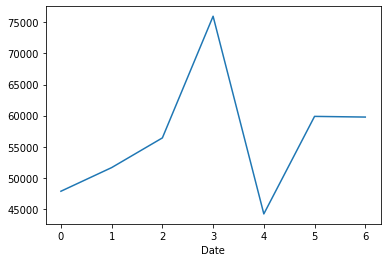

In [499]:
print(dem_weekday)
plt.plot(range(0,len(dem_weekday)),dem_weekday)
plt.xlabel('Date')
plt.show()

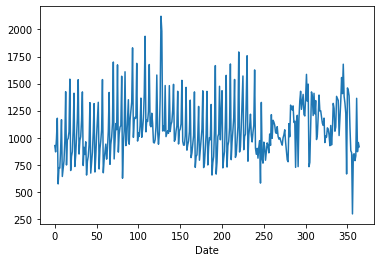

In [500]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(dem_date)),dem_date)
plt.xlabel('Date')
plt.show()


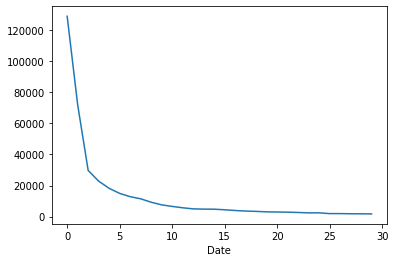

In [503]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(dem_daysbefore)),dem_daysbefore)
plt.xlabel('Date')
plt.show()

In [130]:
second = prediction_validation
diff = (abs(np.rint(second.flatten()) - np.array(validation.demand)))
diff_price = (abs(np.rint(second.flatten()) - np.array(validation.demand)*np.array(val.current_price)))

mse = ((np.rint(second.flatten()) - np.array(validation.demand)**2))
val = validation.copy()
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(all_features.loc[:, utils.scalable_columns])
val[utils.scalable_columns]= sc.inverse_transform(validation.loc[:, utils.scalable_columns])

np.unique(diff)
val["diff_second"] = diff
val["predict"] = np.rint(second.flatten())
val["mse"] = mse

#dem_daysbefore_val = [ np.mean(val[val.days_before_departure.eq(x)].diff_second)/np.mean(val[val.days_before_departure.eq(x)].demand) for x in sorted(val.days_before_departure.unique())]
dem_daysbefore_val = [ np.mean(val[val.days_before_departure.eq(x)].diff_second) for x in sorted(val.days_before_departure.unique())]
#dem_daysbefore_val = [ -np.mean(val[val.days_before_departure.eq(x)].predict)+np.mean(val[val.days_before_departure.eq(x)].demand) for x in sorted(val.days_before_departure.unique())]
dem_daysbefore_va = [ np.mean(val[val.days_before_departure.eq(x)].demand) for x in sorted(val.days_before_departure.unique())]
dem_daysbefore_v = [ np.mean(val[val.days_before_departure.eq(x)].predict) for x in sorted(val.days_before_departure.unique())]
diff_price =  (abs(np.rint(second.flatten()) - np.array(val.demand))*np.array(val.current_price))

print (dem_daysbefore_val)
print (dem_daysbefore_va)
print (dem_daysbefore_v)

print (np.mean(dem_daysbefore_val))
print (np.mean(diff_price))

[4.061721991701245, 3.087153652392947, 1.8648090815273477, 1.6137295081967213, 1.384028484231943, 1.2968906720160482, 1.2306143001007048, 1.1737160120845922, 1.0198329853862214, 0.8802638254693049, 0.7982723577235772, 0.7129629629629629, 0.6539466806063774, 0.7009345794392523, 0.6842644797539723, 0.6121304791029561, 0.5665809768637532, 0.5187891440501043, 0.4939947780678851, 0.43224181360201513, 0.4473947895791583, 0.4162653825575174, 0.4189261031366295, 0.3882167280378748, 0.3724035608308605, 0.2683049147442327, 0.29339477726574503, 0.3062468257998984, 0.2751918158567775, 0.3000514668039115]
[13.193983402489627, 7.442317380352645, 3.0779153766769864, 2.3283811475409837, 1.8051881993896235, 1.5817452357071213, 1.3061430010070494, 1.190332326283988, 0.9290187891440501, 0.8163368848300355, 0.6432926829268293, 0.5493827160493827, 0.483533716675379, 0.5456905503634476, 0.5340850845720143, 0.4617737003058104, 0.44267352185089975, 0.3862212943632568, 0.36553524804177545, 0.28161209068010074,

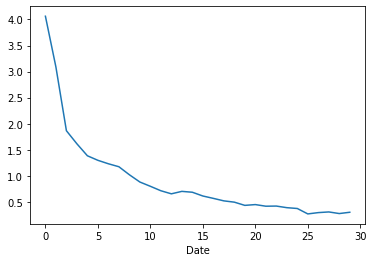

In [116]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(dem_daysbefore_val)),dem_daysbefore_val)
plt.xlabel('Date')
plt.show()

In [127]:
diff_price = (abs(np.rint(second.flatten()) - np.array(validation.demand)*np.array(val.current_price)))


In [126]:
val.current_price

211355    0.000000
22542     0.000000
175520    0.788732
164469    0.788732
53493     0.788732
            ...   
225451    0.577465
67483     0.000000
10644     0.000000
255157    0.788732
227682    0.577465
Name: current_price, Length: 58530, dtype: float64